# Convolution Neural Network (CNN) 
## Detection of Skin Cancer type Melanoma from image data.

In [21]:
## Importing Libraries

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [22]:
## Mounting Goodle Drive to pull the Raw Data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [23]:
## Defining the path for train and test images
data_dir_train = pathlib.Path("gdrive/My Drive/CNN/Train")
data_dir_test = pathlib.Path("gdrive/My Drive/CNN/Test")

In [4]:
## Checking the data image count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train Images Count is " + str(image_count_train))
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images count is " + str(image_count_test))

Train Images Count is 2239
Test images count is 118


# Create a Data Set

In [5]:
## Defining parameters for the loader

batch_size = 32
img_height = 180
img_width = 180

In [6]:
## Creating Train Dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Creating Validation Dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False, smart_resize=False
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
## Listing all classes of Skin Cancer Data

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualize the Data

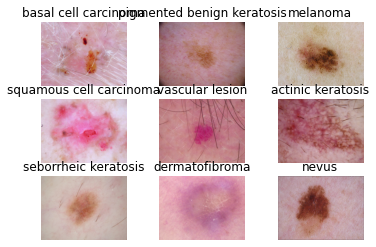

In [9]:
## Visualizing Train Data

import matplotlib.pyplot as plt
num=0
for dirpath, dirnames, filenames in os.walk(str(data_dir_train)):
    for filename in [f for f in filenames if f.endswith(".jpg")][:1]:
        img = PIL.Image.open(str(dirpath)+"/"+str(filename))
        plt.subplot(3,3,num+1)
        plt.title(str(dirpath).split('/')[-1])
        plt.axis('off')
        plt.imshow(img)
        num=num+1

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# **Model Creation**

## **Model 1**

In [11]:
## Model 1 Creation

Model_1=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [12]:
## Compling the Data - Model 1

Model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
## Training the Model 1
epochs = 20
history = Model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 112s 2s/step - loss: 2.9331 - accuracy: 0.1936 - val_loss: 1.9505 - val_accuracy: 0.3020
Epoch 2/20
56/56 [==============================] - 97s 2s/step - loss: 1.8979 - accuracy: 0.3119 - val_loss: 1.8752 - val_accuracy: 0.3110
Epoch 3/20
56/56 [==============================] - 92s 2s/step - loss: 1.7460 - accuracy: 0.3638 - val_loss: 1.7823 - val_accuracy: 0.3602
Epoch 4/20
56/56 [==============================] - 91s 2s/step - loss: 1.6626 - accuracy: 0.4174 - val_loss: 1.7293 - val_accuracy: 0.4072
Epoch 5/20
56/56 [==============================] - 91s 2s/step - loss: 1.5895 - accuracy: 0.4213 - val_loss: 1.5237 - val_accuracy: 0.4832
Epoch 6/20
56/56 [==============================] - 91s 2s/step - loss: 1.4390 - accuracy: 0.5100 - val_loss: 1.5612 - val_accuracy: 0.5034
Epoch 7/20
56/56 [==============================] - 99s 2s/step - loss: 1.4072 - accuracy: 0.5251 - val_loss: 1.4450 - val_accuracy: 0.4966
Epoch 8/20
56/56 [=

In [14]:
# View the summary of all layers
Model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

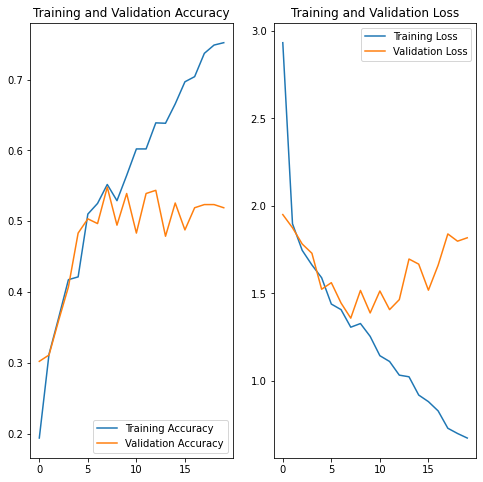

In [15]:
## Visualizig training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Oberservations from Model 1
### - **Model Train Accuracy** is **76%** which is a fair number but not satisfactory.
### - **Model Validation Accuracy** is **52%** which is very low.
### - **Validation Loss** is also in bad shape.
### - By looking at above graphs, it seems to be an **Overfit** situation.

## **Model 2**

In [16]:
## Creating the Model 2

Model_2=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
                             
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Conv2D(128,(3,3),activation='relu',padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.7),
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [17]:
## Compiling the Model 2

Model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [18]:
## Training the Model 2

epochs = 20
history = Model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 307s 5s/step - loss: 2.1878 - accuracy: 0.1786 - val_loss: 2.0917 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 303s 5s/step - loss: 2.0418 - accuracy: 0.1920 - val_loss: 2.0299 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 308s 6s/step - loss: 2.0277 - accuracy: 0.2126 - val_loss: 2.0298 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 302s 5s/step - loss: 2.0231 - accuracy: 0.1914 - val_loss: 2.0021 - val_accuracy: 0.1678
Epoch 5/20
56/56 [==============================] - 302s 5s/step - loss: 1.9788 - accuracy: 0.2121 - val_loss: 1.9806 - val_accuracy: 0.2081
Epoch 6/20
56/56 [==============================] - 303s 5s/step - loss: 1.9258 - accuracy: 0.2835 - val_loss: 1.9805 - val_accuracy: 0.2371
Epoch 7/20
56/56 [==============================] - 302s 5s/step - loss: 1.8393 - accuracy: 0.3181 - val_loss: 2.0666 - val_accuracy: 0.1678
Epoch 8/20
56

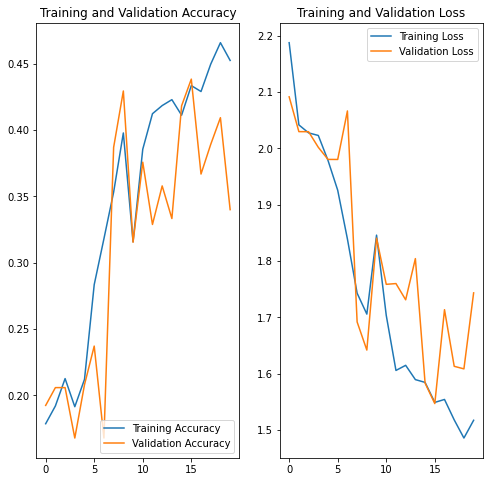

In [19]:
## Visualizing the result

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observations
### - The experiment didn't do well as **Model Train accuracy** dropped to **45%**
### - Negative impact on **Model validation accuracy** is also seen as it dropped to **34%**.


# Reviewing Class imbalance

In [30]:
for i in class_names:
    directory = "gdrive/My Drive/CNN/Train/"+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


## Oberservation
### - Visible Class imbalance
### - Majority of classes are in 3 digits except 2 classes
### - The least class is **seborrheic keratosis** with count of **77**

## Implementing Augmentor

In [32]:
## Installing Augmentor

!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
path_to_training_dataset="gdrive/My Drive/CNN/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to 

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/CNN/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4F873CC1C0>: 100%|██████████| 500/500 [00:20<00:00, 24.21 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/CNN/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4F87870640>: 100%|██████████| 500/500 [00:24<00:00, 20.06 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/CNN/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4F87643AF0>: 100%|██████████| 500/500 [00:18<00:00, 27.28 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/CNN/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F50469D3640>: 100%|██████████| 500/500 [01:29<00:00,  5.61 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/CNN/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4F87AD9F70>: 100%|██████████| 500/500 [01:24<00:00,  5.94 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/CNN/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4F88050F10>: 100%|██████████| 500/500 [00:19<00:00, 25.65 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/CNN/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F4F87B10A60>: 100%|██████████| 500/500 [00:40<00:00, 12.37 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/CNN/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4F8749DD60>: 100%|██████████| 500/500 [00:18<00:00, 27.53 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/CNN/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4F87A5D130>: 100%|██████████| 500/500 [00:17<00:00, 27.87 Samples/s]


In [34]:
## Checking the image count post Augmentor

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [35]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [36]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [37]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [38]:
for i in class_names:
    directory ="gdrive/My Drive/CNN/Train/"+i+'/'
    directory_out ="gdrive/My Drive/CNN/Train/"+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


## Observations
### We can see improvement in class imbalnce
### The least class count is 577

# Model 3 - Post Augmentor

In [39]:
batch_size = 32
img_height = 180
img_width = 180

In [40]:
## Creating Train Data set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [41]:
## Creating Validation Data Set

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [43]:
## Creating the Model 3 - Post Augmentor

Model_3=Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255., offset=0.0,),         
    
    Conv2D(32,(3,3),input_shape=(img_height,img_width,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),   
    Dense(9, activation='softmax')
])

In [45]:
## Compiling the Model 

Model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [46]:
## Training the Model

epochs = 30
## Your code goes here, use 50 epochs.
history = Model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 302s 2s/step - loss: 2.3090 - accuracy: 0.2235 - val_loss: 1.8231 - val_accuracy: 0.3170
Epoch 2/30
169/169 [==============================] - 310s 2s/step - loss: 1.6337 - accuracy: 0.3843 - val_loss: 1.5734 - val_accuracy: 0.4410
Epoch 3/30
169/169 [==============================] - 297s 2s/step - loss: 1.4185 - accuracy: 0.4727 - val_loss: 1.2496 - val_accuracy: 0.5189
Epoch 4/30
169/169 [==============================] - 313s 2s/step - loss: 1.2778 - accuracy: 0.5187 - val_loss: 1.3077 - val_accuracy: 0.5174
Epoch 5/30
169/169 [==============================] - 298s 2s/step - loss: 1.1425 - accuracy: 0.5721 - val_loss: 1.0639 - val_accuracy: 0.6095
Epoch 6/30
169/169 [==============================] - 312s 2s/step - loss: 1.0082 - accuracy: 0.6358 - val_loss: 0.9530 - val_accuracy: 0.6407
Epoch 7/30
169/169 [==============================] - 302s 2s/step - loss: 0.8871 - accuracy: 0.6703 - val_loss: 0.9218 - val_accuracy: 0.6615

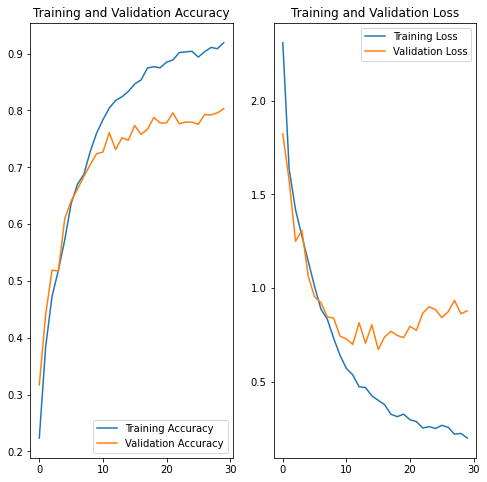

In [47]:
## Visualizing the result

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observations
### Model Train Accuracy has gone up to **91%** which is good.
### Model Validation Accuracy has gone up to **80%** which also looks good.
### Increasing the **epochs** helped alot in making the accuracy close to 90%.
### Class Imbalance treatment effects where on the data as gap between Train & Validation Accuracy reduced close to **10%**